In [1]:
import numpy as np
import seaborn as sns

In [2]:
WIDTH = 1000
HEIGHT = 800
AIRCRAFT_SIZE = 24
COLLISION_RADIUS = 2 * AIRCRAFT_SIZE
SAFE_RADIUS = 4 * COLLISION_RADIUS
GOAL_RADIUS = 2 * COLLISION_RADIUS

FPS = 100
AIRSPEED = 120
MAX_STEPS = 1000

REWARD_GOAL = 2000
REWARD_COLLISION = -2000

In [3]:
goal_x = WIDTH - GOAL_RADIUS
goal_y = HEIGHT / 2

d_separation_max = np.sqrt(WIDTH**2 + HEIGHT**2) + (2 * (AIRSPEED / FPS) * MAX_STEPS)
d_goal_init = (WIDTH - GOAL_RADIUS) - (2 * AIRCRAFT_SIZE)
d_goal_max = d_goal_init + (AIRSPEED / FPS) * MAX_STEPS

In [166]:
print(d_separation_max)

3680.6248474865697


In [73]:
print(d_goal_init)

856


In [74]:
print(d_goal_max)

2056.0


In [4]:
# Distance reward

In [126]:
def distance_reward(d, exp=1.5):
    if d >= 0:
        d_goal_init = (WIDTH - GOAL_RADIUS) - (2 * AIRCRAFT_SIZE)
        return max(0, 1 - (d / d_goal_init) ** exp)
    else:
        raise ValueError("Distance to goal cannot be negative.")

In [127]:
d_values = np.linspace(0, d_goal_max, 100)
rd_values = np.array([distance_reward(x) for x in d_values])

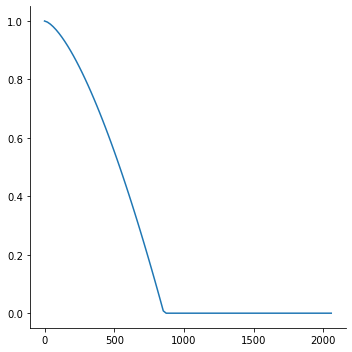

In [128]:
sns.relplot(x = d_values, y=rd_values, kind='line')

In [129]:
distance_reward(d_goal_max)

0

In [130]:
distance_reward(d_goal_init)

0

In [131]:
distance_reward(3*d_goal_init/4)

0.350480947161671

In [132]:
distance_reward(d_goal_init/2)

0.6464466094067263

In [133]:
distance_reward(d_goal_init/4)

0.875

In [134]:
distance_reward(GOAL_RADIUS)

0.9624425409370203

In [135]:
# Separation reward

In [155]:
def separation_reward(s, exp=2):
    if s >= 0:
        return min(1, (s / (2 * SAFE_RADIUS)) ** exp)
    else:
        raise ValueError("Separation cannot be negative.")

In [167]:
s_values = np.linspace(0, 3*SAFE_RADIUS, 100)
rs_values = np.array([separation_reward_05(s) for s in s_values])

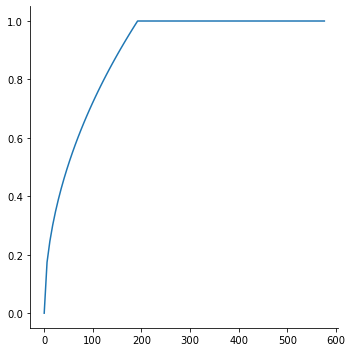

In [168]:
sns.relplot(x = s_values, y=rs_values, kind='line')

In [169]:
separation_reward(0)

0.0

In [170]:
separation_reward(COLLISION_RADIUS)

0.015625

In [171]:
separation_reward(2*COLLISION_RADIUS)

0.0625

In [172]:
separation_reward(SAFE_RADIUS)

0.25

In [173]:
separation_reward(2*SAFE_RADIUS)

1

In [174]:
# Combined distance and separation reward

In [175]:
x_space = [(d, s) for d in d_values for s in s_values]
r_space = [distance_reward(d) * separation_reward(s) for (d, s) in x_space]

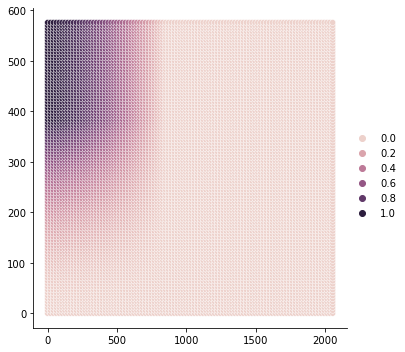

In [176]:
sns.relplot(x = [x[0] for x in x_space], 
            y = [x[1] for x in x_space], 
            hue = r_space, 
            kind='scatter')

In [137]:
# Distance reward

In [138]:
def distance_reward_05(d):
    if d >= 0:
        d_goal_init = (WIDTH - GOAL_RADIUS) - (2 * AIRCRAFT_SIZE)
        return max(0, 1 - (d / d_goal_init) ** 0.5)
    else:
        raise ValueError("Distance to goal cannot be negative.")

In [139]:
d_values = np.linspace(0, 1500, 100)
rd_values = np.array([distance_reward_05(x) for x in d_values])

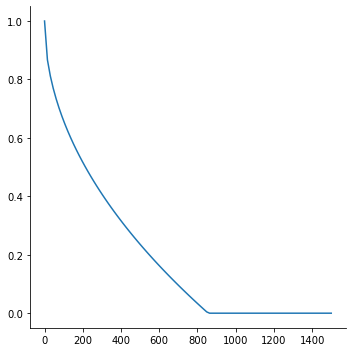

In [140]:
sns.relplot(x = d_values, y=rd_values, kind='line')

In [141]:
# Combined distance and separation reward

In [142]:
x_space = [(d, s) for d in d_values for s in s_values]
r_space = [distance_reward_05(d) * separation_reward_05(s) for (d, s) in x_space]

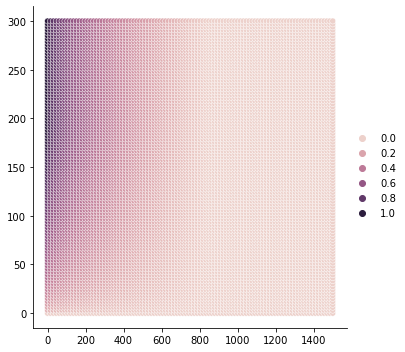

In [143]:
sns.relplot(x = [x[0] for x in x_space], 
            y = [x[1] for x in x_space], 
            hue = r_space, 
            kind='scatter')

In [5]:
def separation_reward_1(s):
    if s >= 0 and s <= SAFE_RADIUS:
        return (REWARD_COLLISION + (-REWARD_COLLISION / SAFE_RADIUS) * s) /  abs(REWARD_COLLISION)
    elif s > SAFE_RADIUS:
        return 0
    else:
        raise ValueError("Separation cannot be negative.")

In [6]:
s_values = np.linspace(0, 400, 100)
rs_values = np.array([separation_reward_1(s) for s in s_values])

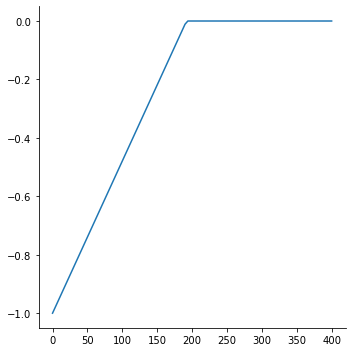

In [7]:
sns.relplot(x = s_values, y=rs_values, kind='line')

In [8]:
# Distance reward 

In [9]:
def distance_reward(d):
    if d >= 0:
        d_goal_init = (WIDTH - GOAL_RADIUS) - (2 * AIRCRAFT_SIZE)
        r = REWARD_GOAL - (REWARD_GOAL / d_goal_init) * d
        return max(r, -REWARD_GOAL) / REWARD_GOAL
    else:
        raise ValueError("Distance to goal cannot be negative.")

In [10]:
d_goal_init = (WIDTH - GOAL_RADIUS) - (2 * AIRCRAFT_SIZE)
d_goal_init

856

In [11]:
d_values = np.linspace(0, 2500, 100)
rd_values = np.array([distance_reward(x) for x in d_values])

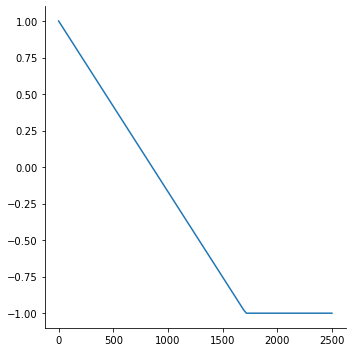

In [12]:
sns.relplot(x = d_values, y=rd_values, kind='line')

In [13]:
# Common reward

In [14]:
def step_reward_1(d, s):
    return distance_reward(d) + separation_reward_1(s)

In [15]:
x_space = [(d, s) for d in d_values for s in s_values]
r_space = [step_reward_1(d, s) for (d, s) in x_space]

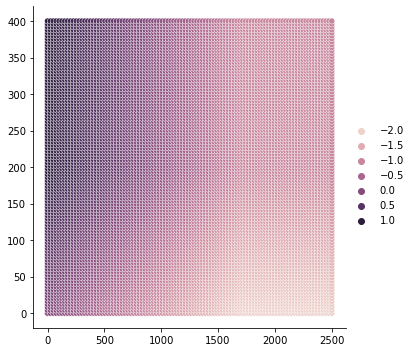

In [16]:
sns.relplot(x = [x[0] for x in x_space], 
            y = [x[1] for x in x_space], 
            hue = r_space, 
            kind='scatter')

In [17]:
# Heading reward

In [18]:
def delta_heading(psi, phi):
    return min(abs(psi-phi), abs(psi-phi-360))

In [19]:
def heading_reward(psi, phi):
    if (0 <= psi <= 360) and (0 <= phi <= 360):
        return (1 - delta_heading(psi, phi)/180) ** 4
    else:
        raise ValueError("Heading and relative angle must be in [0, 360].")

In [20]:
psi_space = np.linspace(0, 360, 361)
dh_space = np.array([delta_heading(psi, 0) for psi in psi_space])
hr_space = np.array([heading_reward(psi, 0) for psi in psi_space])

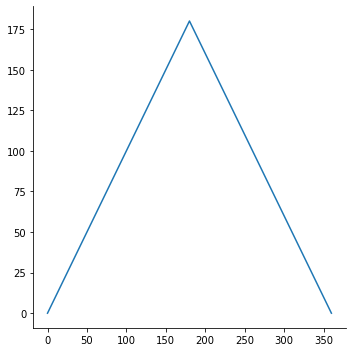

In [21]:
sns.relplot(x = psi_space, 
            y = dh_space,  
            kind='line')

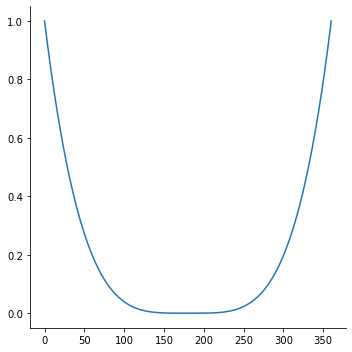

In [22]:
sns.relplot(x = psi_space, 
            y = hr_space,  
            kind='line')

In [23]:
# Alternative separation reward

In [24]:
def separation_reward(s):
    if s >= 0:
        if s <= 2 * COLLISION_RADIUS:
            return 0
        elif s >= SAFE_RADIUS:
            return 1
        else:
            return (s / SAFE_RADIUS) ** 4
    else:
        raise ValueError("Separation cannot be negative.")

In [25]:
s_values = np.linspace(0, 2 * SAFE_RADIUS, 100)
rs_values = np.array([separation_reward(s) for s in s_values])

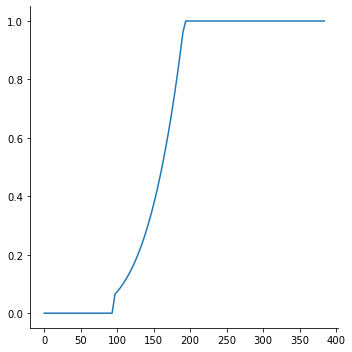

In [26]:
sns.relplot(x = s_values, y=rs_values, kind='line')

In [28]:
# Alternative common reward

def step_reward(psi, phi, s):
    return heading_reward(psi, phi) * separation_reward(s)

In [29]:
phi = 0
psi_space = np.linspace(0, 360, 100)
s_space = np.linspace(0, 2 * SAFE_RADIUS, 100)

x_space = [(psi, s) for psi in psi_space for s in s_space]
r_space = np.array([step_reward(x[0], phi, x[1]) for x in x_space])

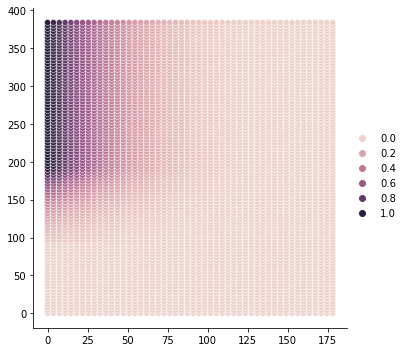

In [30]:
sns.relplot(x = [delta_heading(x[0], phi) for x in x_space], 
            y = [x[1] for x in x_space], 
            hue = r_space, 
            kind='scatter')

In [31]:
step_reward(psi=0, phi=0, s=2*SAFE_RADIUS)

1.0

In [67]:
# Closest point of approach distance reward

In [68]:
def closest_approach_reward(d_cpa):
    if 0 <= d_cpa <= SAFE_RADIUS:
        return (d_cpa / SAFE_RADIUS) ** 2
    else:
        return 1

In [69]:
d_values = np.linspace(-SAFE_RADIUS, 2 * SAFE_RADIUS, 300)
rc_values = np.array([closest_approach_reward(d) for d in d_values])

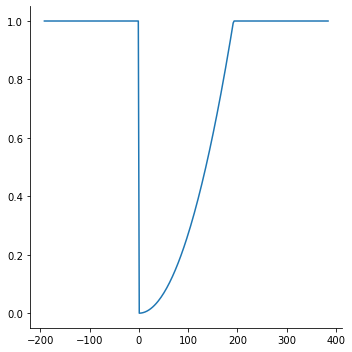

In [70]:
sns.relplot(x = d_values, y=rc_values, kind='line')

In [71]:
closest_approach_reward(-100)

1

In [72]:
closest_approach_reward(0)

0.0

In [73]:
closest_approach_reward(COLLISION_RADIUS)

0.0625

In [74]:
closest_approach_reward(2*COLLISION_RADIUS)

0.25

In [75]:
closest_approach_reward(3*COLLISION_RADIUS)

0.5625

In [76]:
closest_approach_reward(4*COLLISION_RADIUS)

1.0

In [78]:
def closest_approach_reward(d_cpa):
    if 0 <= d_cpa <= SAFE_RADIUS:
        return (d_cpa / SAFE_RADIUS) ** 4
    else:
        return 1

In [79]:
d_values = np.linspace(-SAFE_RADIUS, 2 * SAFE_RADIUS, 300)
rc_values = np.array([closest_approach_reward(d) for d in d_values])

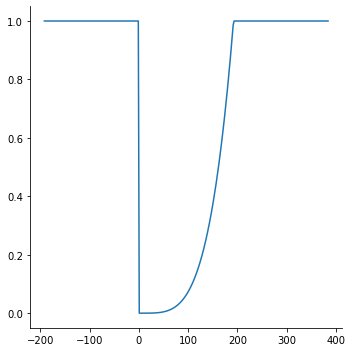

In [80]:
sns.relplot(x = d_values, y=rc_values, kind='line')

In [81]:
closest_approach_reward(-100)

1

In [82]:
closest_approach_reward(0)

0.0

In [83]:
closest_approach_reward(COLLISION_RADIUS)

0.00390625

In [84]:
closest_approach_reward(2*COLLISION_RADIUS)

0.0625

In [85]:
closest_approach_reward(3*COLLISION_RADIUS)

0.31640625

In [86]:
closest_approach_reward(4*COLLISION_RADIUS)

1.0

In [42]:
# Alternative common reward

def step_reward(psi, phi, d_cpa):
    return heading_reward(psi, phi) * closest_approach_reward(d_cpa)

In [43]:
phi = 0
psi_space = np.linspace(0, 360, 100)
d_space = np.linspace(-SAFE_RADIUS, 2 * SAFE_RADIUS, 150)

x_space = [(psi, d) for psi in psi_space for d in d_space]
r_space = np.array([step_reward(x[0], phi, x[1]) for x in x_space])

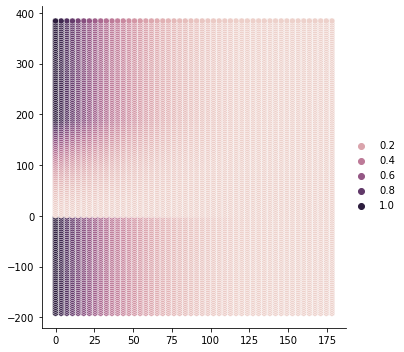

In [44]:
sns.relplot(x = [delta_heading(x[0], phi) for x in x_space], 
            y = [x[1] for x in x_space], 
            hue = r_space, 
            kind='scatter')

In [15]:
time_steps = np.linspace(0, 1000, 1000)
tdf = np.array([1 - (t / (2 * 1000)) for t in time_steps])

In [16]:
min(tdf)

0.5

In [17]:
max(tdf)

1.0

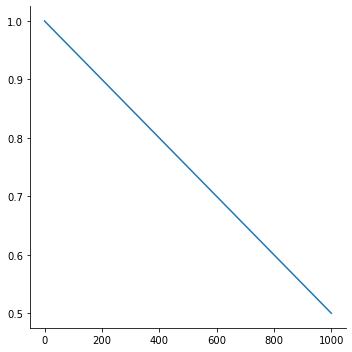

In [18]:
sns.relplot(x = time_steps, y=tdf, kind='line')